## F1

The value of p is: [ 333.41568449 -276.92332599]
The value of x_new is: [1.25437598 1.78872427]
The value of grad_diff is: [ 292.49936856 -156.94696601]
The value of p is: [-0.88700323 -1.8852835 ]
The value of x_new is: [0.56478835 0.32303832]
The value of grad_diff is: [105.71470011 -42.24254628]
The value of p is: [-0.00752906 -0.01780898]
The value of x_new is: [0.56435754 0.32201929]
The value of grad_diff is: [ 0.12006372 -0.10651671]
The value of p is: [-0.00120373 -0.00135392]
The value of x_new is: [0.56435662 0.32201825]
The value of grad_diff is: [-1.36212436e-06  7.25066740e-07]
The value of p is: [1.47162539 1.65752509]
The value of x_new is: [0.70807004 0.48388594]
The value of grad_diff is: [ 6.03205303 -4.19941973]
The value of p is: [-0.01324814 -0.0043421 ]
The value of x_new is: [0.69449563 0.4794369 ]
The value of grad_diff is: [-4.17511182  2.91799226]
The value of p is: [0.07017047 0.1004095 ]
The value of x_new is: [0.80622489 0.6393144 ]
The value of grad_diff i

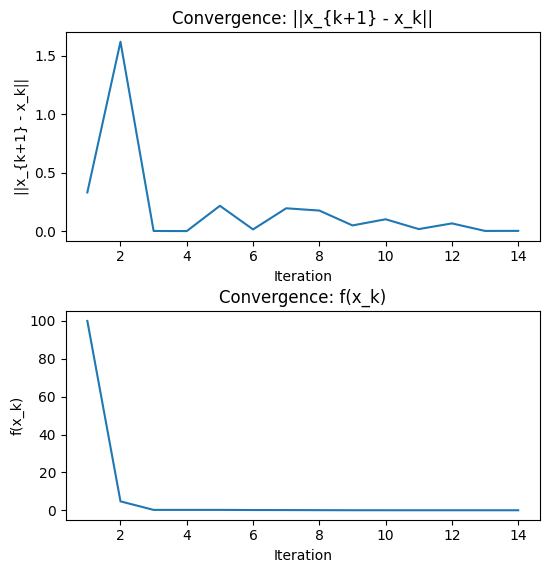

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad, jacobian

num_calls = {'f': 0, 'grad_f': 0, 'phi': 0, 'grad_phi':0}

def zoom(func, grad_func, x, p, alpha_lo, alpha_hi, c1=0.4, c2=0.8, max_iters=10):
    """
    Zoom operation for line search.

    Parameters:
    - func: Objective function.
    - grad_func: Gradient function.
    - x: Current point.
    - p: Search direction.
    - alpha_lo: Lower bound of the step length interval.
    - alpha_hi: Upper bound of the step length interval.
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """
    i = 0
    alpha0 =0
    while True:
        alpha_j = (alpha_lo + alpha_hi) / 2

        phi_fun_0 = func(x, p, 0.0)
        phi_fun_j = func(x, p, alpha_j)
        num_calls['phi'] += 2
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1


        if phi_fun_j > phi_fun_0 + c1 * alpha_j * grad_phi_fun_0 :
            alpha_hi = alpha_j
            #print(f'in zoom: {alpha_hi}')
        else:
            grad_phi_fun_j = grad_func(x, p, alpha_j)
            num_calls['grad_phi'] += 1

            if abs(phi_fun_j) <= - c2 * grad_phi_fun_0:
              alpha_star = alpha_j
              return alpha_star

            if grad_phi_fun_j * (alpha_hi - alpha_lo) >= 0:
                alpha_hi = alpha_lo

            alpha_lo = alpha_j
        i += 1

        if i >= 15:
           return (alpha_lo + alpha_hi) / 2


def line_search_with_zoom(func, grad_func, x, p, alpha_init=0.0, alpha_max=100, c1=0.40, c2=0.80, max_iters=100):
    """
    Line search algorithm with zoom.

    Parameters:
    - func: phi_fun.
    - grad_func: grad_phi_fun.
    - x: Current point.
    - p: Search direction.
    - alpha_init: Initial step length (default: 1.0).
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations for the zoom operation (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """

    #ahpha_lo = alpha_i_1
    #alpha_hi =alpha_i
    alpha_lo  = alpha_init
    alpha_i = (alpha_init + alpha_max) / 2
    alpha_im1 = 0.0
    # alpha_hi = alpha


    phi_fun_0 = func(x, p, 0.0)
    num_calls['phi'] += 1
    while True:

        phi_fun_i = func(x, p, alpha_i)
        num_calls['phi'] += 1
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1

        if phi_fun_i > phi_fun_0 + c1 * alpha_i * grad_phi_fun_0 :
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i, c1=0.4, c2=0.8)
            return alpha_star

        grad_phi_fun_i = grad_func(x, p, alpha_i)
        num_calls['grad_phi'] += 1
        if abs(phi_fun_i) <= -c2 * grad_phi_fun_0:
            alpha_star = alpha_i
            return alpha_star

        if grad_phi_fun_i >= 0:
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i , c1=0.4, c2=0.8)
            return alpha_star

        # alpha_lo = alpha
        # alpha = (alpha_lo + alpha_max) / 2
        alpha_im1 = alpha_i
        alpha_i = (alpha_i + alpha_max) / 2

    return alpha_star

#####################

def bfgs(f ,grad_f, func, grad_func, hessian_func, initial_x):
    x = initial_x
    x_history = [x]
    f_history = [f(x)]
    num_calls['f'] += 1
    convergence_norm_diff = []
    H0 = hessian_func(f, x)
    H = [H0]
    k=0
    epsilon = 0.01
    num_calls['grad_f'] += 1
    while np.linalg.norm((grad_f(x))) >= epsilon:
        # Perform optimization step
        p = -np.dot(H[k], grad_f(x))  # Compute search direction
        num_calls['grad_f'] += 1
        print("The value of p is:", p)
        alpha = line_search_with_zoom(func, grad_func, x, p)
        x_new = x + alpha * p  # Update iterate
        print("The value of x_new is:", x_new)
        s = alpha* p
        s = (alpha * p).reshape(-1, 1)
        f_new = f(x_new)
        num_calls['f'] += 1
        # Compute gradient difference for Hessian update
        grad_diff = grad_f(x_new) - grad_f(x)
        num_calls['grad_f'] += 2
        print("The value of grad_diff is:", grad_diff)
        # Update Hessian approximation using BFGS formula
        y = grad_diff.reshape(-1,1)
        rho = 1 / np.dot(s.T, y)
        I = np.eye(len(x))
        H_new = np.dot((I - rho * np.dot(s, y.T)), np.dot(H[k], (I - rho * np.dot(y, s.T)))) + rho * np.dot(s, s.T)
        # Store convergence information
        x_history.append(x_new)
        f_history.append(f_new)
        H.append(H_new)
        convergence_norm_diff.append(np.linalg.norm(x_new - x))
        # Check termination condition
        if np.linalg.norm(x_new - x) < 1e-6:
            break
        x = x_new
        k += 1
    return x_history, f_history, convergence_norm_diff

#######################


def f(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2


def grad_f(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])



def phi_fun(x, p, alpha):
    x1, x2 = x
    p1, p2 = p
    return 100 * ((x2 + alpha * p2) - (x1 + alpha * p1)**2)**2 + (1 - (x1 + alpha * p1))**2


def grad_phi_fun(x, p, alpha):
    x1, x2 = x
    p1, p2 = p

    term1 = 2 * (x2 + alpha * p2 - (x1 + alpha * p1)**2) * (p2 - 2 * (x1 + alpha * p1) * p1)
    term2 = 2 * (1 - (x1 + alpha * p1)) * (-p1)

    grad_phi = 100*term1 + term2

    return grad_phi

def hessian(f, x):
    hessian_f = jacobian(jacobian(f))
    hessian = hessian_f(x)
    hessian= hessian / np.linalg.norm(hessian)
    return hessian

#############################################
# Example usage
#c1=0.4, c2=0.8
initial_x = np.array([1.0, 2.0])  # Initial point
max_iters = 100

x_history, f_history, convergence_norm_diff = bfgs(f, grad_f, phi_fun, grad_phi_fun, hessian , initial_x)

# Plot convergence
iterations = np.arange(1, len(convergence_norm_diff) + 1)  # Adjusted iterations

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout(pad=3.0)

ax[0].plot(iterations, convergence_norm_diff)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('||x_{k+1} - x_k||')
ax[0].set_title('Convergence: ||x_{k+1} - x_k||')

ax[1].plot(iterations, f_history[:-1])  # Adjusted for correct length
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('f(x_k)')
ax[1].set_title('Convergence: f(x_k)')

plt.show()


In [15]:
num_calls


{'f': 15, 'grad_f': 43, 'phi': 326, 'grad_phi': 216}

## F2

The value of p is: [  49.8273811  -191.3843572    48.89996792  -32.59997861]
The value of x_new is: [1.3041222  0.83188259 2.29846172 1.80102552]
The value of grad_diff is: [  59.06291885 -421.19176435  367.94603688  -40.06668813]
The value of p is: [  46.40942084  -80.60146577 -103.14516607  -26.29205659]
The value of x_new is: [1.44575251 0.58590643 1.98368765 1.72078853]
The value of grad_diff is: [   9.27825559    6.79865344 -119.9983513    -1.73010114]
The value of p is: [-0.849442   -0.74062677 -0.81501901  1.03959198]
The value of x_new is: [1.27984587 0.44125277 1.82450425 1.92383384]
The value of grad_diff is: [ -7.28953868  -2.98058978 -48.88630806  13.47308579]
The value of p is: [ 12.23196703  -0.17617814  -5.78478648 -12.4321476 ]
The value of x_new is: [1.42916187 0.43910216 1.75388918 1.77207423]
The value of grad_diff is: [  9.4117377   13.02277665 -32.06699281  -9.8815389 ]
The value of p is: [ 0.06491953 -0.27823267 -0.62663604 -0.05122978]
The value of x_new is: [1.4

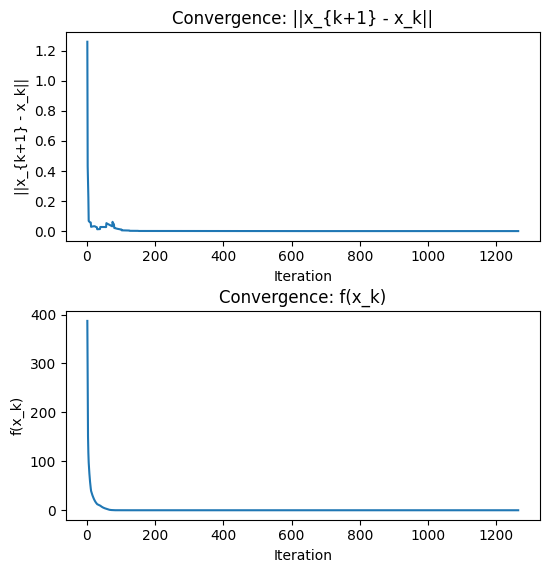

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad, jacobian

num_calls = {'f': 0, 'grad_f': 0, 'phi': 0, 'grad_phi':0}

def zoom(func, grad_func, x, p, alpha_lo, alpha_hi, c1=0.4, c2=0.8, max_iters=10):
    """
    Zoom operation for line search.

    Parameters:
    - func: Objective function.
    - grad_func: Gradient function.
    - x: Current point.
    - p: Search direction.
    - alpha_lo: Lower bound of the step length interval.
    - alpha_hi: Upper bound of the step length interval.
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """
    i = 0
    alpha0 =0
    while True:
        alpha_j = (alpha_lo + alpha_hi) / 2

        phi_fun_0 = func(x, p, 0.0)
        phi_fun_j = func(x, p, alpha_j)
        num_calls['phi'] += 2
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1


        if phi_fun_j > phi_fun_0 + c1 * alpha_j * grad_phi_fun_0 :
            alpha_hi = alpha_j
            #print(f'in zoom: {alpha_hi}')
        else:
            grad_phi_fun_j = grad_func(x, p, alpha_j)
            num_calls['grad_phi'] += 1

            if abs(phi_fun_j) <= - c2 * grad_phi_fun_0:
              alpha_star = alpha_j
              return alpha_star

            if grad_phi_fun_j * (alpha_hi - alpha_lo) >= 0:
                alpha_hi = alpha_lo

            alpha_lo = alpha_j
        i += 1

        if i >= 15:
           return (alpha_lo + alpha_hi) / 2


def line_search_with_zoom(func, grad_func, x, p, alpha_init=0.0, alpha_max=100, c1=0.40, c2=0.80, max_iters=100):
    """
    Line search algorithm with zoom.

    Parameters:
    - func: phi_fun.
    - grad_func: grad_phi_fun.
    - x: Current point.
    - p: Search direction.
    - alpha_init: Initial step length (default: 1.0).
    - c1: Sufficient decrease parameter (default: 0.5).
    - c2: Curvature parameter (default: 0.9).
    - max_iters: Maximum number of iterations for the zoom operation (default: 10).

    Returns:
    - alpha: Step length satisfying the strong Wolfe conditions.
    """

    #ahpha_lo = alpha_i_1
    #alpha_hi =alpha_i
    alpha_lo  = alpha_init
    alpha_i = (alpha_init + alpha_max) / 2
    alpha_im1 = 0.0
    # alpha_hi = alpha


    phi_fun_0 = func(x, p, 0.0)
    num_calls['phi'] += 1
    while True:

        phi_fun_i = func(x, p, alpha_i)
        num_calls['phi'] += 1
        grad_phi_fun_0 = grad_func(x, p, 0.0)
        num_calls['grad_phi'] += 1

        if phi_fun_i > phi_fun_0 + c1 * alpha_i * grad_phi_fun_0 :
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i, c1=0.4, c2=0.8)
            return alpha_star

        grad_phi_fun_i = grad_func(x, p, alpha_i)
        num_calls['grad_phi'] += 1
        if abs(phi_fun_i) <= -c2 * grad_phi_fun_0:
            alpha_star = alpha_i
            return alpha_star

        if grad_phi_fun_i >= 0:
            alpha_star = zoom(func, grad_func, x, p, alpha_im1 , alpha_i , c1=0.4, c2=0.8)
            return alpha_star

        # alpha_lo = alpha
        # alpha = (alpha_lo + alpha_max) / 2
        alpha_im1 = alpha_i
        alpha_i = (alpha_i + alpha_max) / 2

    return alpha_star

#####################

def bfgs(f ,grad_f, func, grad_func, hessian_func, initial_x):
    x = initial_x
    x_history = [x]
    f_history = [f(x)]
    num_calls['f'] += 1
    convergence_norm_diff = []
    H0 = hessian_func(f, x)
    H = [H0]
    k=0
    epsilon = 0.01
    num_calls['grad_f'] += 1
    while np.linalg.norm((grad_f(x))) >= epsilon:
        # Perform optimization step
        p = -np.dot(H[k], grad_f(x))  # Compute search direction
        num_calls['grad_f'] += 1
        print("The value of p is:", p)
        alpha = line_search_with_zoom(func, grad_func, x, p)
        x_new = x + alpha * p  # Update iterate
        print("The value of x_new is:", x_new)
        s = alpha* p
        s = (alpha * p).reshape(-1, 1)
        f_new = f(x_new)
        num_calls['f'] += 1
        # Compute gradient difference for Hessian update
        grad_diff = grad_f(x_new) - grad_f(x)
        num_calls['grad_f'] += 2
        print("The value of grad_diff is:", grad_diff)
        # Update Hessian approximation using BFGS formula
        y = grad_diff.reshape(-1,1)
        rho = 1 / np.dot(s.T, y)
        I = np.eye(len(x))
        H_new = np.dot((I - rho * np.dot(s, y.T)), np.dot(H[k], (I - rho * np.dot(y, s.T)))) + rho * np.dot(s, s.T)
        # Store convergence information
        x_history.append(x_new)
        f_history.append(f_new)
        H.append(H_new)
        convergence_norm_diff.append(np.linalg.norm(x_new - x))
        # Check termination condition
        if np.linalg.norm(x_new - x) < 1e-6:
            break
        x = x_new
        k += 1
    return x_history, f_history, convergence_norm_diff

#######################


def f(x):
    x1, x2, x3, x4 = x
    return (x1 - 10 * x2)**2 + 5 * (x3 - x4)**2 + (x2 - 2 * x3)**4 + 10 * (x1 - x4)**4

def grad_f(x):
    x1, x2, x3, x4 = x
    df_dx1 = 2 * (x1 - 10 * x2) + 40 * (x1 - x4)**3
    df_dx2 = -20 * (x1 - 10 * x2) + 4 * (x2 - 2 * x3)**3
    df_dx3 = 10 * (x3 - x4) - 8 * (x2 - 2 * x3)**3
    df_dx4 = -10 * (x3 - x4) - 40 * (x1 - x4)**3
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4])

def phi_fun(x, p, alpha):
    x1, x2, x3, x4 = x
    p1, p2, p3, p4 = p
    return ((x1 + alpha * p1) - 10 * (x2 + alpha * p2))**2 + \
           5 * (x3 + alpha * p3 - x4 - alpha * p4)**2 + \
           (x2 + alpha * p2 - 2 * (x3 + alpha * p3))**4 + \
           10 * (x1 + alpha * p1 - x4 - alpha * p4)**4

def grad_phi_fun(x, p, alpha):
    x1, x2, x3, x4 = x
    p1, p2, p3, p4 = p

    term1 = 2 * (x1 + alpha * p1 - 10 * (x2 + alpha * p2)) * (p1 - 10 * p2)
    term2 = 10 * (x2 + alpha * p2 - 2 * (x3 + alpha * p3))**3 * (p2 - 2 * p3)
    term3 = 10 * (x1 + alpha * p1 - x4 - alpha * p4)**3 * (p1 - p4)
    term4 = 5 * (x3 + alpha * p3 - x4 - alpha * p4) * (p3 - p4)

    grad_phi = term1 + term2 + term3 + term4

    return grad_phi

def hessian(f, x):
    hessian_f = jacobian(jacobian(f))
    hessian = hessian_f(x)
    hessian= hessian / np.linalg.norm(hessian)
    return hessian

#############################################
# Example usage
#c1=0.4, c2=0.8
initial_x = np.array([1.0, 2.0, 2.0, 2.0])  # Initial point
max_iters = 100

x_history, f_history, convergence_norm_diff = bfgs(f, grad_f, phi_fun, grad_phi_fun, hessian , initial_x)

# Plot convergence
iterations = np.arange(1, len(convergence_norm_diff) + 1)  # Adjusted iterations

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
fig.tight_layout(pad=3.0)

ax[0].plot(iterations, convergence_norm_diff)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('||x_{k+1} - x_k||')
ax[0].set_title('Convergence: ||x_{k+1} - x_k||')

ax[1].plot(iterations, f_history[:-1])  # Adjusted for correct length
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('f(x_k)')
ax[1].set_title('Convergence: f(x_k)')

plt.show()


In [18]:
num_calls


{'f': 1266, 'grad_f': 3796, 'phi': 38600, 'grad_phi': 19543}